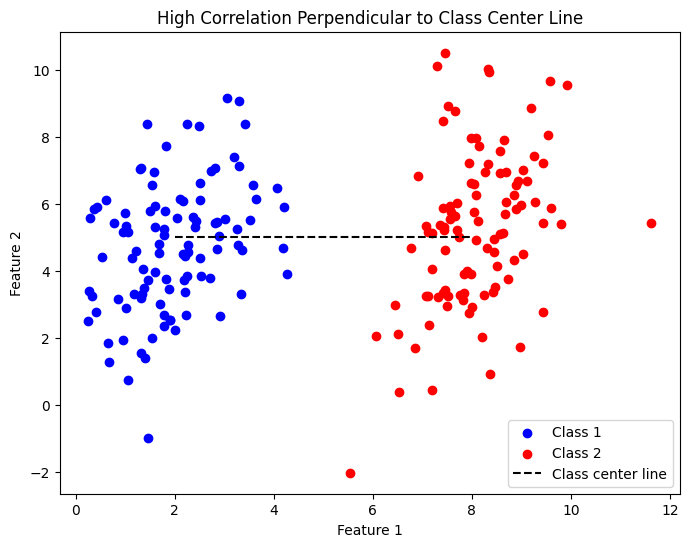

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define class centers
center_class_1 = [2, 5]
center_class_2 = [8, 5]

# Define covariance matrices (high spread perpendicular to the class center line)
cov_class_1 = [[1, 0.9], [0.9, 5]]  # Class 1: high covariance perpendicular to the class center line
cov_class_2 = [[1, 0.9], [0.9, 5]]  # Class 2: high covariance perpendicular to the class center line

# Generate data using numpy's multivariate normal function
class_1_data = np.random.multivariate_normal(center_class_1, cov_class_1, 100)
class_2_data = np.random.multivariate_normal(center_class_2, cov_class_2, 100)

# Plotting
plt.figure(figsize=(8, 6))

# Plot class 1
plt.scatter(class_1_data[:, 0], class_1_data[:, 1], color='blue', label='Class 1')

# Plot class 2
plt.scatter(class_2_data[:, 0], class_2_data[:, 1], color='red', label='Class 2')

# Draw line between class centers
plt.plot([center_class_1[0], center_class_2[0]], [center_class_1[1], center_class_2[1]], 'k--', label='Class center line')




plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('High Correlation Perpendicular to Class Center Line')
plt.legend()
plt.show()


In [3]:
cov_class_1

[[1, 0.9], [0.9, 5]]

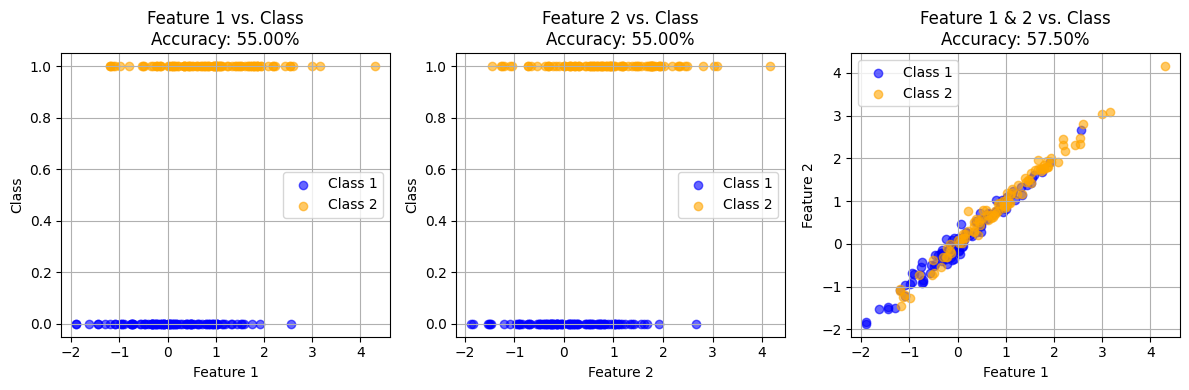

Accuracy using only Feature 1: 55.00%
Accuracy using only Feature 2: 55.00%
Accuracy using both Features: 57.50%


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate two classes with identical covariance matrices
mean_class_1 = [0, 0]  # Class 1 center at (0, 0)
mean_class_2 = [1, 1]  # Class 2 center at (1, 1)
cov = [[1, 0.99], [0.99, 1]]  # High correlation between the two variables

# Generate 100 samples for each class
X_class_1 = np.random.multivariate_normal(mean_class_1, cov, 100)
X_class_2 = np.random.multivariate_normal(mean_class_2, cov, 100)

# Combine the two classes into one dataset
X = np.vstack([X_class_1, X_class_2])
y = np.hstack([np.zeros(100), np.ones(100)])  # Class labels: 0 for class 1, 1 for class 2

# Train a logistic regression model to classify the data using both features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_combined = LogisticRegression()
model_combined.fit(X_train, y_train)
y_pred_combined = model_combined.predict(X_test)
accuracy_combined = accuracy_score(y_test, y_pred_combined)

# Train a logistic regression model using only Feature 1
model_feature_1 = LogisticRegression()
model_feature_1.fit(X_train[:, [0]], y_train)  # Use only feature 1
y_pred_feature_1 = model_feature_1.predict(X_test[:, [0]])
accuracy_feature_1 = accuracy_score(y_test, y_pred_feature_1)

# Train a logistic regression model using only Feature 2
model_feature_2 = LogisticRegression()
model_feature_2.fit(X_train[:, [1]], y_train)  # Use only feature 2
y_pred_feature_2 = model_feature_2.predict(X_test[:, [1]])
accuracy_feature_2 = accuracy_score(y_test, y_pred_feature_2)

# Plot Feature 1 vs. y (class labels)
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_class_1[:, 0], np.zeros(100), color='blue', label='Class 1', alpha=0.6)
plt.scatter(X_class_2[:, 0], np.ones(100), color='orange', label='Class 2', alpha=0.6)
plt.title(f"Feature 1 vs. Class\nAccuracy: {accuracy_feature_1 * 100:.2f}%")
plt.xlabel("Feature 1")
plt.ylabel("Class")
plt.grid(True)
plt.legend()

# Plot Feature 2 vs. y (class labels)
plt.subplot(1, 3, 2)
plt.scatter(X_class_1[:, 1], np.zeros(100), color='blue', label='Class 1', alpha=0.6)
plt.scatter(X_class_2[:, 1], np.ones(100), color='orange', label='Class 2', alpha=0.6)
plt.title(f"Feature 2 vs. Class\nAccuracy: {accuracy_feature_2 * 100:.2f}%")
plt.xlabel("Feature 2")
plt.ylabel("Class")
plt.grid(True)
plt.legend()

# Plot combined Feature 1 and Feature 2 vs. y (class labels)
plt.subplot(1, 3, 3)
plt.scatter(X_class_1[:, 0], X_class_1[:, 1], color='blue', label='Class 1', alpha=0.6)
plt.scatter(X_class_2[:, 0], X_class_2[:, 1], color='orange', label='Class 2', alpha=0.6)
plt.title(f"Feature 1 & 2 vs. Class\nAccuracy: {accuracy_combined * 100:.2f}%")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print accuracies
print(f"Accuracy using only Feature 1: {accuracy_feature_1 * 100:.2f}%")
print(f"Accuracy using only Feature 2: {accuracy_feature_2 * 100:.2f}%")
print(f"Accuracy using both Features: {accuracy_combined * 100:.2f}%")


Accuracy with combined feature: 0.77


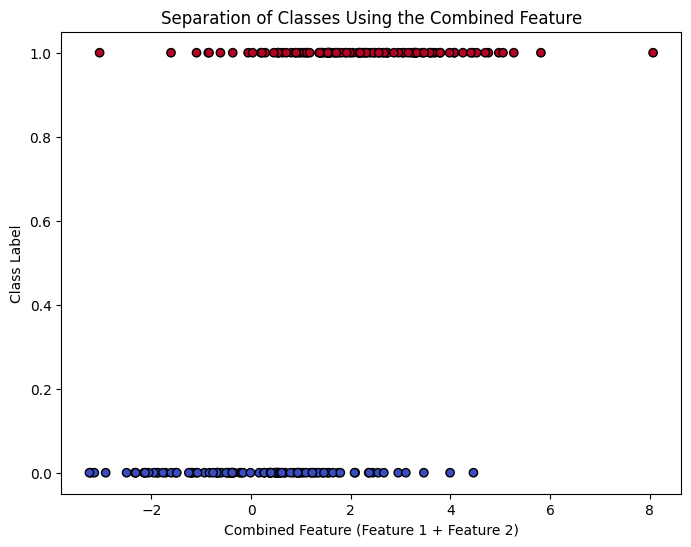

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic dataset with two features
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Create a new feature as a linear combination (sum) of Feature 1 and Feature 2
X_new_feature = X[:, 0] + X[:, 1]

# Reshape X_new_feature to 2D (for model fitting)
X_combined = X_new_feature.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Fit logistic regression model using the new combined feature
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with combined feature: {accuracy:.2f}")

# Plot the new feature vs class labels
plt.figure(figsize=(8, 6))
plt.scatter(X_combined, y, c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Combined Feature (Feature 1 + Feature 2)')
plt.ylabel('Class Label')
plt.title('Separation of Classes Using the Combined Feature')
plt.show()


Accuracy with Random Forest: 0.85


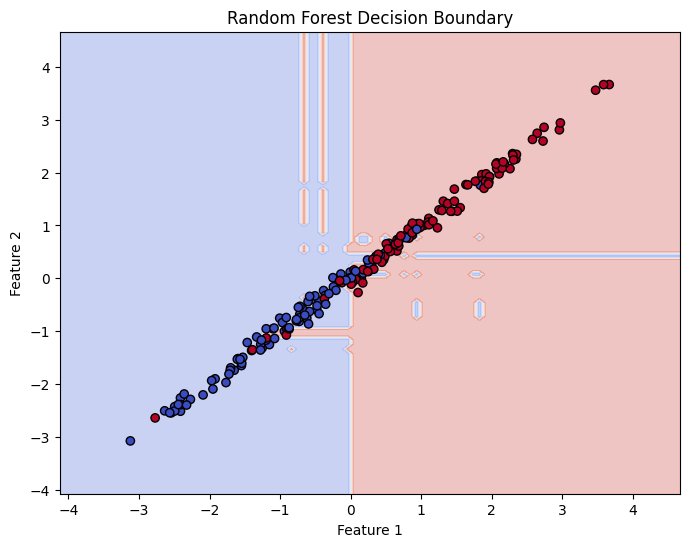

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic dataset with two features
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Introduce correlation between the features
X[:, 1] = X[:, 0] + np.random.normal(0, 0.1, size=X[:, 0].shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Random Forest: {accuracy:.2f}")

# Plotting the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Decision Boundary')
plt.show()


In [2]:
X, y

(array([[-0.87292898, -0.96370185],
        [ 1.31293463,  1.4590983 ],
        [ 2.34042818,  2.25737066],
        [ 2.29454774,  2.35992446],
        [ 0.94410516,  1.03279606],
        [-0.11959689, -0.04017301],
        [ 0.1510847 , -0.00861006],
        [-0.00745441,  0.11737887],
        [-1.25396925, -1.31821763],
        [-0.24392415, -0.16051844],
        [-1.9208928 , -1.90299531],
        [ 0.48806269,  0.48115524],
        [ 2.25751204,  2.07547982],
        [-3.12190908, -3.07783339],
        [ 1.87768113,  1.96025274],
        [ 0.46785542,  0.35341739],
        [ 0.48404809,  0.41284971],
        [-0.54235518, -0.39939338],
        [ 1.04235818,  1.00263657],
        [ 1.63367133,  1.7743964 ],
        [ 1.85756778,  1.96243542],
        [-2.41167954, -2.51607639],
        [ 0.87481918,  0.81973828],
        [ 0.09529002,  0.0773282 ],
        [-1.64994223, -1.73876102],
        [-0.65245349, -0.65745706],
        [ 2.10252081,  1.97719921],
        [ 2.9574463 ,  2.810